[20, -7, 22, -14, 14, 5, 14, 5, 2, 5, 14, -1, 2, -8, -3, 11, -3, -8, 17, -15, -16, 22, 1, -13, 18, 20, -15, 21, 22, 5]


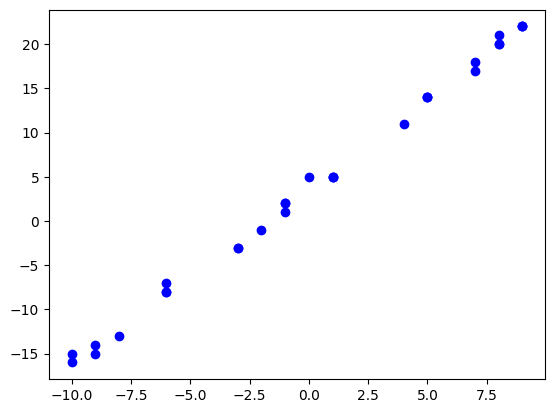

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt

w = 2
b = 3
xlim = [-10, 10]
x_train = np.random.randint(-10, 10, size=30)

y_train = [w*x +b+random.randint(0,2) for x in x_train]
print(y_train)

plt.plot(x_train,y_train,'bo')

In [2]:
# 构建模型
import torch
from torch import nn

class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, input):
        return (input * self.weight) + self.bias

In [3]:
model = LinearModel()
x = torch.tensor(3)
y = model(x)
y, model.weight

(tensor([-1.0750], grad_fn=<AddBackward0>),
 Parameter containing:
 tensor([-0.4500], requires_grad=True))

In [4]:
model1 = LinearModel()

# 定义优化器
optimizer = torch.optim.SGD(model1.parameters(), lr=1e-4, weight_decay=1e-2, momentum=0.9)

y_train = torch.tensor(y_train, dtype=torch.float32)

for _ in range(1000):
    input = torch.from_numpy(x_train)
    output = model1(input)
    loss = nn.MSELoss()(output, y_train)
    model1.zero_grad()
    loss.backward()
    optimizer.step()

for parameter in model1.named_parameters():
    print(parameter)

('weight', Parameter containing:
tensor([2.0100], requires_grad=True))
('bias', Parameter containing:
tensor([3.3311], requires_grad=True))


In [5]:
torch.save(model1.state_dict(),'./linear_model.pth')

In [6]:
import torchvision.models as models

In [7]:
alexnet = models.alexnet(weights='DEFAULT')

In [8]:
from PIL import Image
import torchvision
import torchvision.transforms as transforms

In [9]:
img = Image.open('dog.webp')

transform = transforms.Compose([
    transforms.RandomResizedCrop((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

input_tensor = transform(img).unsqueeze(0) 
alexnet(input_tensor).argmax()

tensor(332)

In [10]:
cifar10_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

Files already downloaded and verified


In [11]:
from torch.utils.data import DataLoader

tensor_dataloader = DataLoader(dataset=cifar10_dataset, batch_size=160)
data_iter = iter(tensor_dataloader)
img_tensor, label_tensor = next(data_iter)

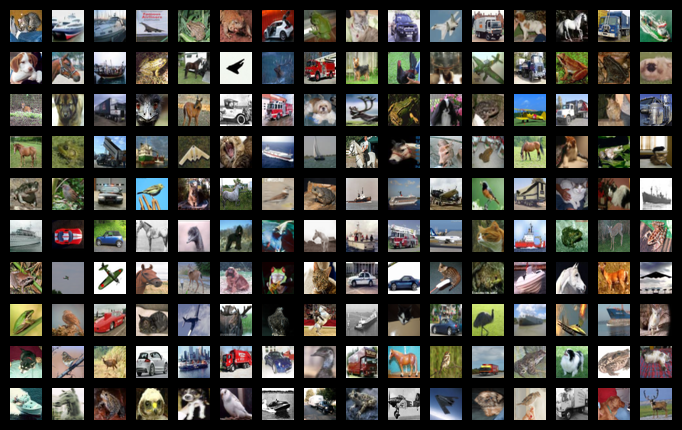

In [12]:
grid_tensor = torchvision.utils.make_grid(img_tensor,nrow=16, padding=10)
grid_img = transforms.ToPILImage()(grid_tensor)
display(grid_img)

In [13]:
cifar10_dataset1= torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, target_transform=None, download=True)

Files already downloaded and verified


In [14]:
dataloader = DataLoader(dataset=cifar10_dataset1, batch_size=32,shuffle=True, num_workers=2)

In [15]:
optimizer = torch.optim.SGD(alexnet.parameters(), lr=1e-4, weight_decay=1e-2, momentum=0.9)

# 训练3个Epoch
for epoch in range(3):
    for item in dataloader: 
        output = alexnet(item[0])
        target = item[1]
        # 使用交叉熵损失函数
        loss = nn.CrossEntropyLoss()(output, target)
    
        #以下代码的含义，我们在之前的文章中已经介绍过了
        alexnet.zero_grad()
        loss.backward()
        optimizer.step()

In [16]:
img = Image.open('dog.webp')

transform = transforms.Compose([
    transforms.RandomResizedCrop((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

input_tensor = transform(img).unsqueeze(0) 
alexnet(input_tensor).argmax()

tensor(151)

In [18]:
torch.__version__

'2.2.2'